In [22]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [23]:
#Define any constants used
kB = 1.38 * 10**(-23)

In [24]:
#Choose a temperature
T = 50 #K

In [25]:
#define inverse cumulative distribution function (icdf) for boltzmann dist
# p(E) = e^(-E)/'Z1
#'Z1 is 1
def icdf(u):
    return -sp.log(1-u)

In [26]:
#Generates a number, n, of random energies based on above icdf
def rand_E(n):
    return icdf(sp.stats.uniform.rvs(size=n))

In [27]:
#Defining initial conditions and parameters for harmonic oscillator system
E_0 = rand_E(1) #random energy generated from boltzmann dist
print(E_0)
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_0/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_0/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_0/k0)**(1/2), (2*E_0/m)**(1/2))
print(u0)

[ 1.076244]
[ 6.56123158] [ 1.0374218]
[-4.29402061 -0.78439701]


In [28]:
def k(t):
    k = k0
    if k > 0:
        k = k0 - .0001*t
    if k <= 0:
        k = 0
    return k

In [29]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [30]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
tf = 800
tn = 2001
dt = tf/(tn-1)
t = sp.linspace(0,tf,tn)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


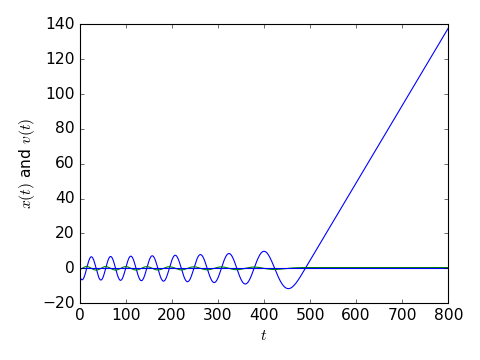

In [31]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [32]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[137.9175132263145, 1.0274897005657375]


In [33]:
#Calculating energy at each time step
for i in range (0,tn):
    Energy = 1/2*m*v[i]**2 + 1/2*k(i*dt)*x[i]**2
    print(Energy)

1.07624399706
1.07584815761
1.0753979331
1.07489364674
1.07433646424
1.0737283903
1.07307225013
1.07237161833
1.07163077567
1.07085463671
1.07004866994
1.06921879327
1.06837136778
1.06751297502
1.06665032938
1.06579026498
1.06493954106
1.06410477871
1.06329233627
1.06250821743
1.06175797199
1.06104661254
1.06037853535
1.0597574522
1.05918633368
1.05866736333
1.05820190232
1.05779047163
1.05743274436
1.05712755123
1.05687289999
1.05666600768
1.05650334564
1.05638069403
1.0562932097
1.056235501
1.05620171393
1.05618562147
1.05618072332
1.05618034452
1.05617773835
1.0561661961
1.05613914514
1.05609025184
1.05601352105
1.055903386
1.05575479417
1.05556328493
1.05532505695
1.05503702564
1.05469686887
1.05430306807
1.0538549251
1.05335256255
1.05279693477
1.05218981834
1.05153375038
1.05083203598
1.05008865768
1.04930823057
1.04849593781
1.04765743378
1.04679877466
1.04592630865
1.0450465927
1.04416629071
1.04329206191
1.04243047836
1.0415879057
1.04077042209
1.03998372167
1.03923302252
1.03